In [1]:
import numpy as np

from Code.Torsh.TorchMacsumAggregationLearning import *
from Code.Torsh.Torsh_data_generation import *

import csv
import pandas as pd
%load_ext autoreload
%autoreload 2

Using device: cpu


In [2]:
N = 20
# C'est le vrai noyau que l'on va essayer de retrouver
phi_true = np.random.uniform(low=-1.0, high=1.0, size=N) 
macsum_true = Macsum(N,phi_true)
print("True Kernel : ",phi_true)

True Kernel :  [ 0.35974042 -0.85894409 -0.71201077 -0.67705298  0.36706681  0.15876987
  0.23667121  0.67458091 -0.97914499 -0.15494802  0.37995991 -0.98455498
 -0.53907853  0.961313   -0.29898333 -0.27568202  0.80519059  0.47138813
  0.45882482 -0.33505346]


In [3]:
n_samples = 1000
X,Y = generate_data(macsum_true,phi_true,n_samples=n_samples,noise_level=0.0,borne=100,generation="gauss",multi=1)
five_percent = int(n_samples * 0.05)
X_eval = np.concatenate([X[:five_percent], X[-five_percent:]], axis=0)
Y_eval = np.concatenate([Y[:five_percent], Y[-five_percent:]], axis=0)
X,Y = X[five_percent:-five_percent],Y[five_percent:-five_percent]

assert  np.array_equal(macsum_true.phi,phi_true), f"macsum.phi: {macsum_true.phi}, phi_true {phi_true}"
assert X.shape[0] == Y.shape[0], f"Shape mismatch: X has {X.shape} rows, Y has {Y.shape} rows"
assert X_eval.shape[0] == Y_eval.shape[0], f"Shape mismatch: X has {X_eval.shape} rows, Y has {Y_eval.shape} rows"

In [4]:
plot_3d_points(X,Y)

Starting PyTorch Adam training (Macsum with Manual Gradient for Phi)...


Adam Training (Macsum Manual Grad): 100%|██████████| 10000/10000 [00:49<00:00, 201.54it/s]


Training finished for Macsum (max epochs reached or converged earlier via manual grad fit_adam).


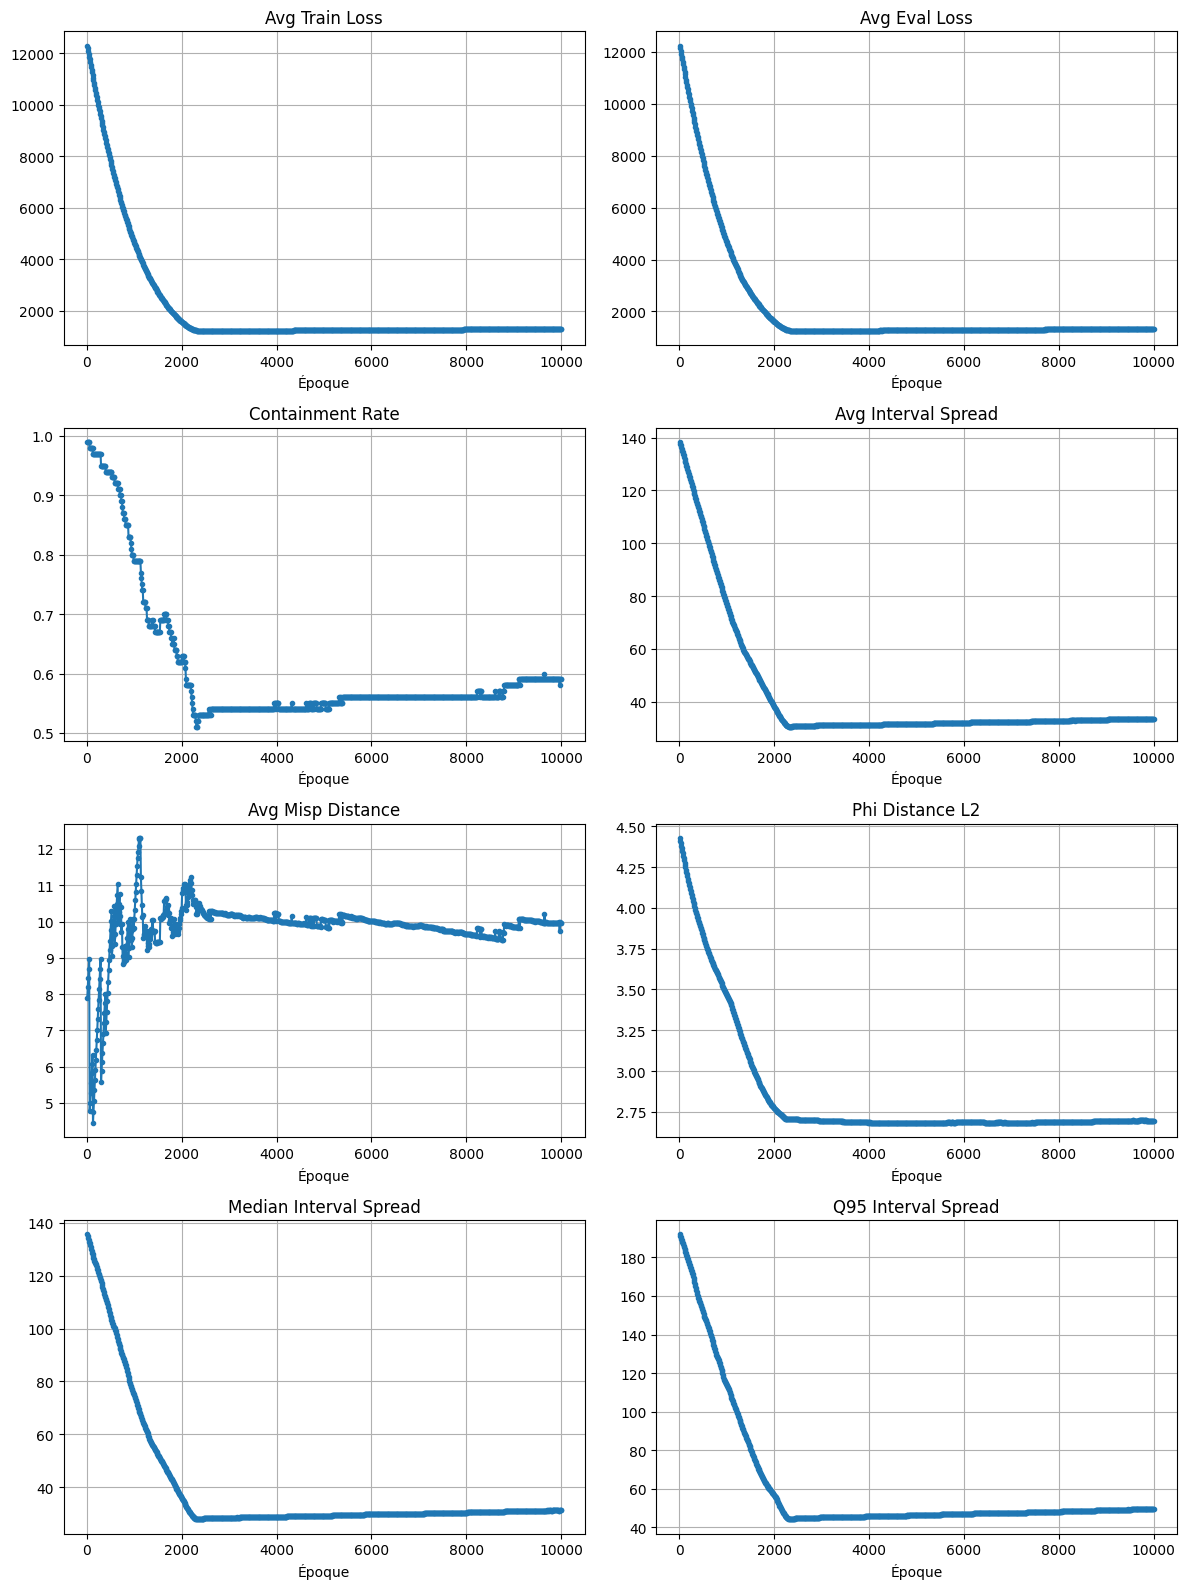

{'containment_rate': 0.63,
 'avg_misp_distance': 10.095810508761062,
 'avg_eval_loss': 1288.6433510256777,
 'avg_train_loss': nan,
 'avg_interval_spread': 33.39429364702061,
 'median_interval_spread': 31.650767476570607,
 'q95_interval_spread': 48.88129061008452,
 'phi_distance_l2': None}

In [47]:
macsum =  Macsum(N)
macsum.fit_adam(X,Y,X_eval,Y_eval,phi_true_for_eval=phi_true,n_epochs = 10000,learning_rate=1e-4,epsilon_conv=1e-5,batch_size=128,beta1=0.8,beta2=0.99)
plot_metrics_complet(macsum.history)
evaluate_model_complet(X,Y,macsum)


In [ ]:
plot_metric_by_key(macsum.history,)

In [ ]:
macsum_sig =  MacsumSigmoidTorch(N,alpha=0.1,gamma=0.8,k_sigmoid=0.1)
macsum_sig.fit_adam(X,Y,X_eval,Y_eval,n_epochs = 10000,phi_true_for_eval=phi_true,learning_rate=1e-4,epsilon_conv=1e-5,batch_size=128,beta1=0.8,beta2=0.99)
plot_metrics_complet(macsum_sig.history)
evaluate_model_complet(X,Y,macsum_sig)

In [ ]:
print(macsum_sig.history)
plot_metric_by_key(macsum_sig.history)

[{'containment_rate': 0.86, 'avg_misp_distance': 10.107290972550768, 'avg_eval_loss': 60.71789720187231, 'avg_train_loss': 104.85696071464423, 'avg_interval_spread': 105.39634413883776, 'median_interval_spread': 101.3834625663695, 'q95_interval_spread': 158.90258479129065, 'phi_distance_l2': 4.741973656767737, 'epoch': 10}, {'containment_rate': 0.86, 'avg_misp_distance': 9.700205337178355, 'avg_eval_loss': 59.610364132339065, 'avg_train_loss': 102.90523745524169, 'avg_interval_spread': 105.73326356689293, 'median_interval_spread': 101.82182362067348, 'q95_interval_spread': 159.34937282572096, 'phi_distance_l2': 4.7447803448709465, 'epoch': 20}, {'containment_rate': 0.88, 'avg_misp_distance': 10.801941415252893, 'avg_eval_loss': 58.27650657015346, 'avg_train_loss': 100.5608263500561, 'avg_interval_spread': 106.15034298630714, 'median_interval_spread': 102.31367073091954, 'q95_interval_spread': 159.94507786141133, 'phi_distance_l2': 4.747899810485833, 'epoch': 30}, {'containment_rate': 0

In [42]:
N = 50
# C'est le vrai noyau que l'on va essayer de retrouver
#phi_true = np.random.uniform(low=-10.0, high=10.0, size=N) 

mu,sigma = 20,3
mus = np.random.uniform(-mu, mu, size=N)
sigmas = np.random.uniform(1/sigma, sigma, size=N)
phi_true = np.random.normal(loc=mus, scale=sigmas)

macsum_true = Macsum(N,phi_true)
print("True Kernel : ",phi_true)

True Kernel :  [  5.131581    -0.48900168  -2.05100149  13.84699871 -17.62736133
  16.41961816   7.88271076  12.16345452  10.11951613   0.17827747
  -7.82439417 -16.97469243  -7.94813236  -6.84204131  -4.74692236
  -4.93421516  18.8094906  -16.10995773   5.27839925   5.25003783
   0.09358629   3.91659787 -19.25796759  -4.11968784   1.75266892
  -7.97163222  -7.95390222 -12.93275299  10.23949929   0.23192767
  15.98249644  19.46796544  12.05758452 -19.24159333   6.67079148
  -7.48205783 -11.06284645   9.76475352  -5.76308275  17.61090157
  14.5582064   -3.26020684   4.87393549   3.86370081   3.45311883
  18.02837211   9.04341195 -16.51151251 -12.64184009  -1.58863955]


In [43]:
n_samples = 2000
X,Y = generate_data(macsum_true,phi_true,n_samples=n_samples,noise_level=0.0,borne=100,generation="gauss",multi=1)
five_percent = int(n_samples * 0.05)
X_eval = np.concatenate([X[:five_percent], X[-five_percent:]], axis=0)
Y_eval = np.concatenate([Y[:five_percent], Y[-five_percent:]], axis=0)
X,Y = X[five_percent:-five_percent],Y[five_percent:-five_percent]

assert  np.array_equal(macsum_true.phi,phi_true), f"macsum.phi: {macsum.phi}, phi_true {phi_true}"
assert X.shape[0] == Y.shape[0], f"Shape mismatch: X has {X.shape} rows, Y has {Y.shape} rows"
assert X_eval.shape[0] == Y_eval.shape[0], f"Shape mismatch: X has {X_eval.shape} rows, Y has {Y_eval.shape} rows"

In [18]:
#plot_3d_points(X,Y)

Starting PyTorch Adam training (MacsumSigmoidTorch with Manual Gradient for Phi)...


Adam Training (MacsumSigmoidTorch Manual Grad): 100%|██████████| 2500/2500 [00:52<00:00, 47.88it/s]


Training finished for MacsumSigmoidTorch (max epochs reached or converged earlier via manual grad fit_adam).


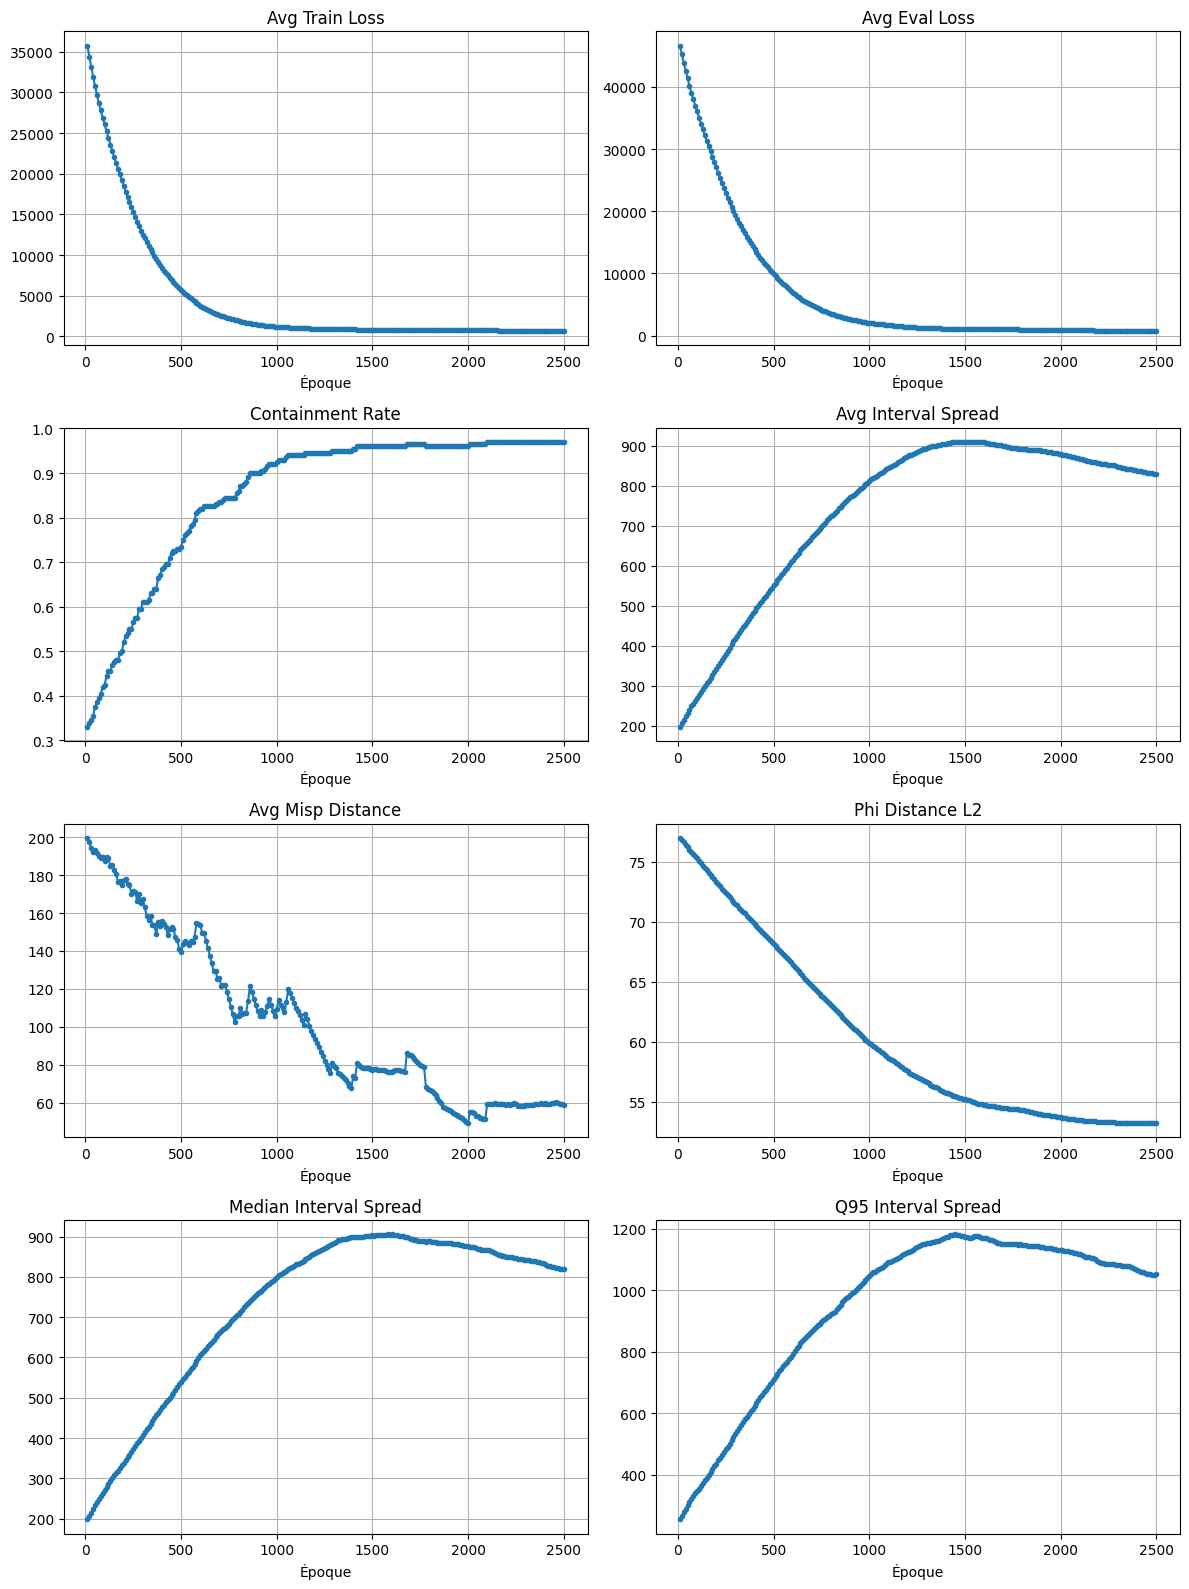

{'containment_rate': 0.9788888888888889,
 'avg_misp_distance': 31.025274611798924,
 'avg_eval_loss': 694.6203529339917,
 'avg_train_loss': nan,
 'avg_interval_spread': 820.8907906094412,
 'median_interval_spread': 811.6279292589409,
 'q95_interval_spread': 1091.352137111697,
 'phi_distance_l2': None}

In [60]:
macsum_sig =  MacsumSigmoidTorch(N,alpha=0.8)
macsum_sig.fit_adam(X,Y,X_eval,Y_eval,n_epochs = 2500,phi_true_for_eval=phi_true,learning_rate=1e-3,epsilon_conv=1e-4,batch_size=256,beta1=0.8,beta2=0.99)
plot_metrics_complet(macsum_sig.history)
evaluate_model_complet(X,Y,macsum_sig)

Starting PyTorch Adam training (Macsum with Manual Gradient for Phi)...


Adam Training (Macsum Manual Grad): 100%|██████████| 2500/2500 [00:54<00:00, 45.79it/s]


Training finished for Macsum (max epochs reached or converged earlier via manual grad fit_adam).


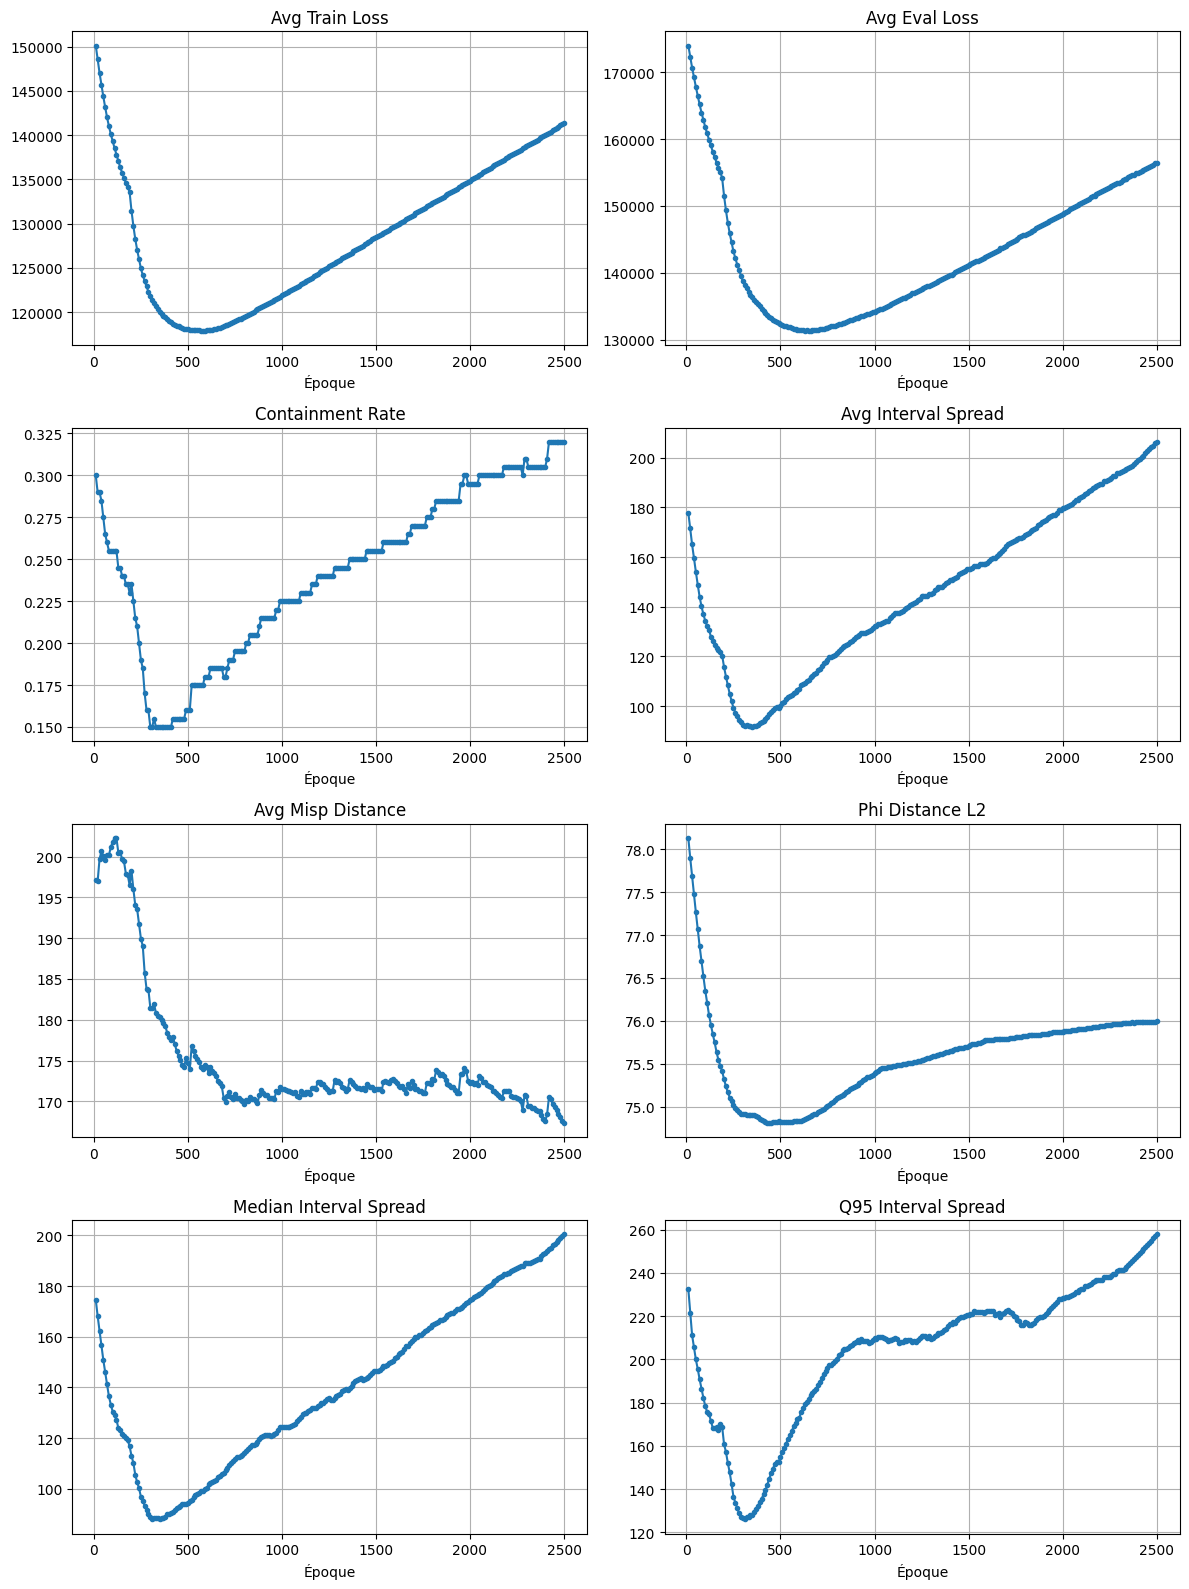

{'containment_rate': 0.3327777777777778,
 'avg_misp_distance': 161.7584462283587,
 'avg_eval_loss': 141403.92033886357,
 'avg_train_loss': nan,
 'avg_interval_spread': 201.77087852710417,
 'median_interval_spread': 197.0619990812607,
 'q95_interval_spread': 258.37698379631905,
 'phi_distance_l2': None}

In [47]:
macsum =  Macsum(N)
macsum.fit_adam(X,Y,X_eval,Y_eval,n_epochs = 2500,phi_true_for_eval=phi_true,learning_rate=1e-3,epsilon_conv=1e-4,batch_size=256,beta1=0.8,beta2=0.99)
plot_metrics_complet(macsum.history)
evaluate_model_complet(X,Y,macsum)

In [48]:
X_tensor = torch.tensor(X, dtype=torch.float64)
y_pred = macsum_true.forward(X_tensor)  # y_upper
mean_y = np.mean(y_pred[1].detach().numpy())
mean_y2 = np.mean(y_pred[0].detach().numpy())
print(mean_y,mean_y2)
print(np.mean(Y))
print(np.percentile(Y,5),np.percentile(Y,95))


1051.387508325003 -1037.7336525020257
6.826927911488616
-433.45196361400525 439.9960333994199


### Gaps data


In [44]:
tmp_phi = phi_true #macsum_sigmoide.phi
print(tmp_phi)
print(phi_gaps.shape)

[  5.131581    -0.48900168  -2.05100149  13.84699871 -17.62736133
  16.41961816   7.88271076  12.16345452  10.11951613   0.17827747
  -7.82439417 -16.97469243  -7.94813236  -6.84204131  -4.74692236
  -4.93421516  18.8094906  -16.10995773   5.27839925   5.25003783
   0.09358629   3.91659787 -19.25796759  -4.11968784   1.75266892
  -7.97163222  -7.95390222 -12.93275299  10.23949929   0.23192767
  15.98249644  19.46796544  12.05758452 -19.24159333   6.67079148
  -7.48205783 -11.06284645   9.76475352  -5.76308275  17.61090157
  14.5582064   -3.26020684   4.87393549   3.86370081   3.45311883
  18.02837211   9.04341195 -16.51151251 -12.64184009  -1.58863955]
(49,)


In [49]:

macsum_gaps = Macsum(N,tmp_phi)
print(evaluate_model_complet(X,Y,macsum_gaps))
print(np.mean(Y))

{'containment_rate': 1.0, 'avg_misp_distance': 0.0, 'avg_eval_loss': 2254638.8180834283, 'avg_train_loss': nan, 'avg_interval_spread': 2089.1211608270282, 'median_interval_spread': 2063.044054996467, 'q95_interval_spread': 2755.59232677225, 'phi_distance_l2': None}
6.826927911488616


In [58]:
n=30
X_gaps = X[:,n:]
phi_gaps = tmp_phi[n:]
print(phi_gaps)
macsum_gaps = Macsum(N-n,phi_gaps)
print(evaluate_model_complet(X_gaps,Y,macsum_gaps))
print(np.mean(Y))

[ 15.98249644  19.46796544  12.05758452 -19.24159333   6.67079148
  -7.48205783 -11.06284645   9.76475352  -5.76308275  17.61090157
  14.5582064   -3.26020684   4.87393549   3.86370081   3.45311883
  18.02837211   9.04341195 -16.51151251 -12.64184009  -1.58863955]
{'containment_rate': 0.9911111111111112, 'avg_misp_distance': 110.92524621657985, 'avg_eval_loss': 1672211.8460101201, 'avg_train_loss': nan, 'avg_interval_spread': 1727.1012334085176, 'median_interval_spread': 1687.1231051907725, 'q95_interval_spread': 2438.162582496528, 'phi_distance_l2': None}
6.826927911488616


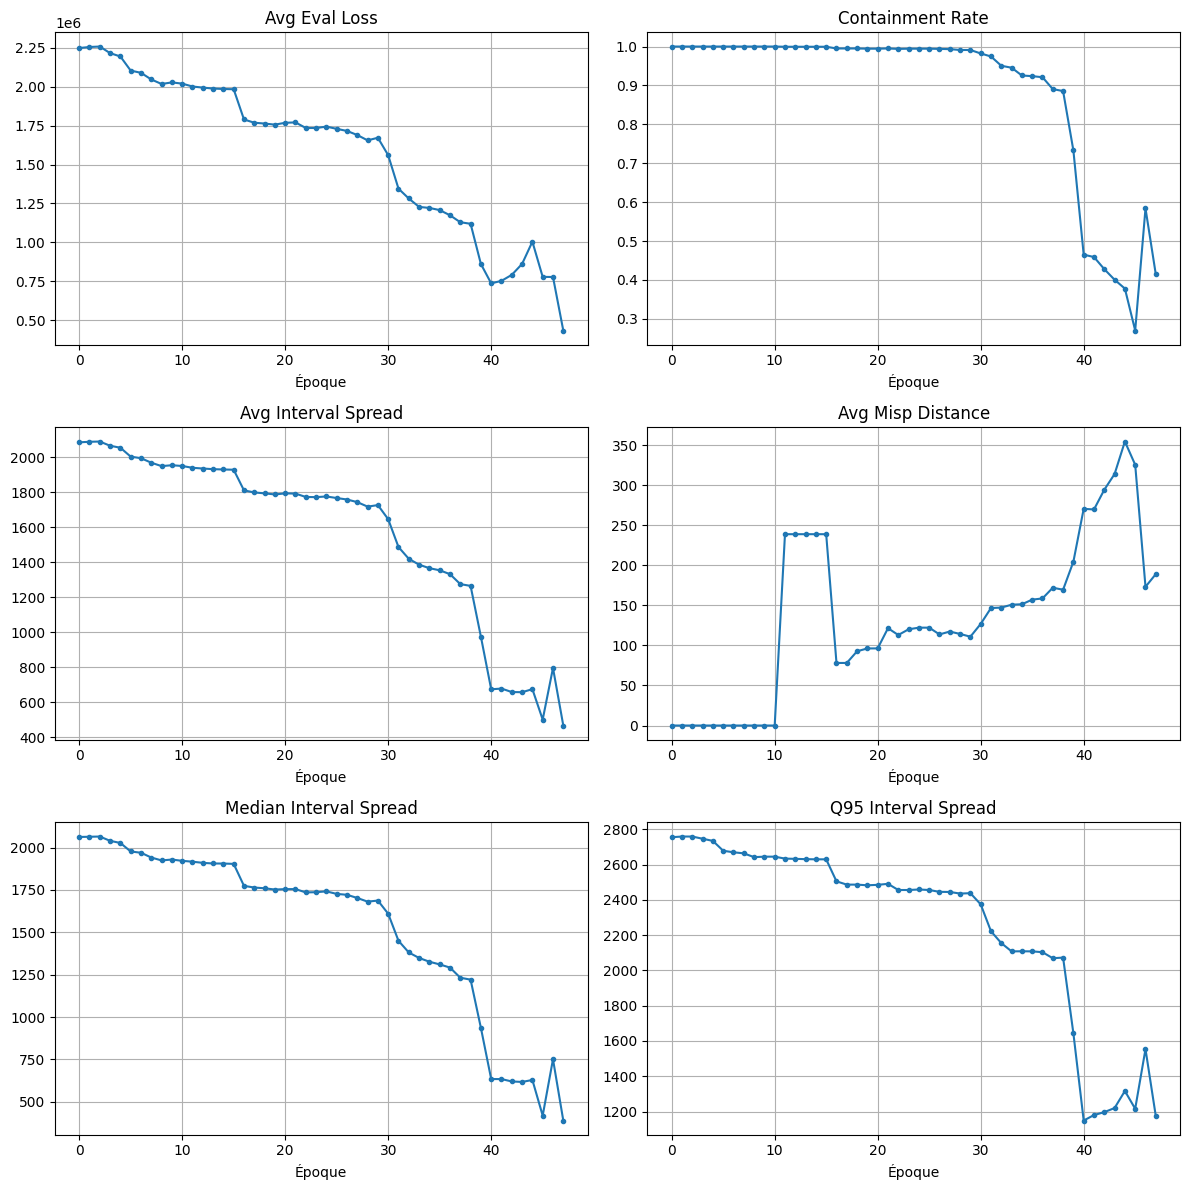

In [72]:
tmp_phi = phi_true
l=[]
for n in range(1,N-1):
    X_gaps = X[:,n:]
    phi_gaps = tmp_phi[n:]
    macsum_gaps = Macsum(N-n,phi_gaps)
    l.append(evaluate_model_complet(X_gaps,Y,macsum_gaps))

plot_metrics_complet(l)

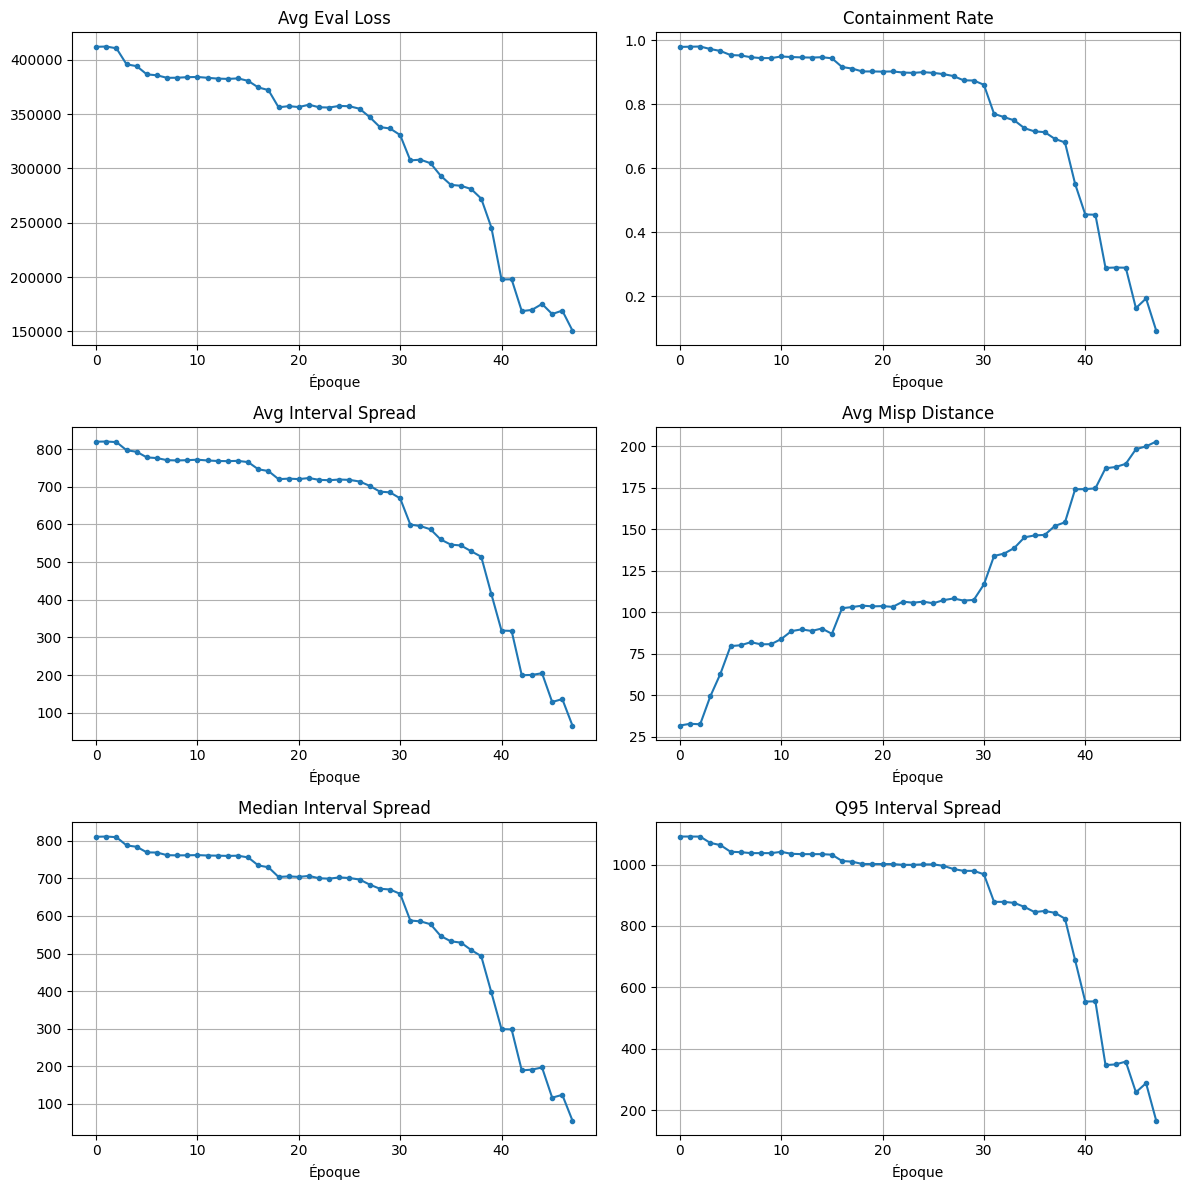

In [ ]:
tmp_phi = macsum_sig.phi
l=[]
for n in range(1,N-1):
    X_gaps = X[:,n:]
    phi_gaps = tmp_phi[n:]
    macsum_gaps = Macsum(N-n,phi_gaps)
    l.append(evaluate_model_complet(X_gaps,Y,macsum_gaps))

plot_metrics_complet(l)
